In [1]:
# Importing essential libraries for data processing, visualization, and modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn for machine learning
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
# Upload your 'breast-cancer.csv' file manually when prompted
from google.colab import files
uploaded = files.upload()

# Read the first uploaded file as a DataFrame
df = pd.read_csv(next(iter(uploaded)))
df.head()  # Display the first 5 rows


Saving breast-cancer.csv to breast-cancer.csv


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Remove any unnamed or ID columns if present
df = df.loc[:, ~df.columns.str.contains('^Unnamed|id', case=False)]

# Convert 'diagnosis' column: M -> 1 (malignant), B -> 0 (benign)
if 'diagnosis' in df.columns:
    df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Define features (X) and labels (y)
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# Normalize features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [4]:
# Train an SVM classifier with a linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

# Predict and evaluate on the test set
y_pred_linear = svm_linear.predict(X_test)
print("🔹 SVM with Linear Kernel")
print(confusion_matrix(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))


🔹 SVM with Linear Kernel
[[68  3]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [5]:
# Train an SVM classifier with a non-linear (RBF) kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rbf = svm_rbf.predict(X_test)
print("🔹 SVM with RBF Kernel")
print(confusion_matrix(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))


🔹 SVM with RBF Kernel
[[70  1]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [6]:
# Tune hyperparameters C and gamma using Grid Search with cross-validation
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(X_train, y_train)

# Print best parameters and evaluate best model
print("🔍 Best Parameters:", grid.best_params_)
y_pred_best = grid.predict(X_test)
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


🔍 Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
[[71  0]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [7]:
# Evaluate the best model using 5-fold cross-validation
cv_scores = cross_val_score(grid.best_estimator_, X_scaled, y, cv=5)
print("📈 Cross-validation Accuracy: {:.2f}%".format(np.mean(cv_scores) * 100))


📈 Cross-validation Accuracy: 97.89%


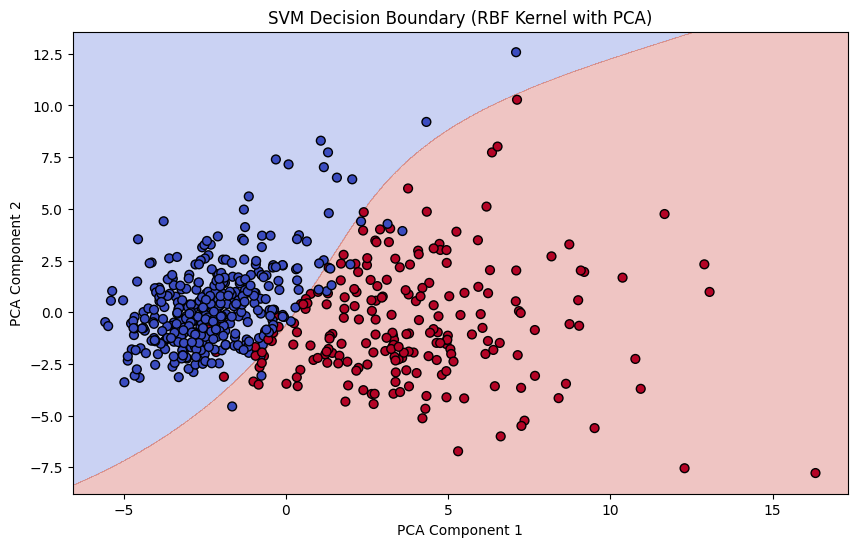

In [8]:
# Reduce feature space to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Re-train the best SVM model on the 2D PCA data
svm_vis = SVC(kernel='rbf', C=grid.best_params_['C'], gamma=grid.best_params_['gamma'])
svm_vis.fit(X_pca, y)

# Create mesh grid for plotting decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict over mesh grid
Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and data points
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.coolwarm, s=40, edgecolors='k')
plt.title('SVM Decision Boundary (RBF Kernel with PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
